In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("results-shap_values.csv")

In [3]:
def plot_heatmap(data, title, cmap="viridis", fmt=".2f"):
    plt.figure(figsize=(10, 6))

    im = plt.imshow(
        data,
        aspect="auto",
        origin="lower",
        cmap=cmap
    )

    plt.colorbar(im, label="Most Important Index")

    plt.xticks(
        ticks=np.arange(len(data.columns)),
        labels=data.columns,
        rotation=45,
        ha="right"
    )
    plt.yticks(
        ticks=np.arange(len(data.index)),
        labels=data.index
    )

    # Annotate each cell
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = data.iloc[i, j]
            if not pd.isna(val):
                plt.text(
                    j, i,
                    format(val, fmt),
                    ha="center",
                    va="center",
                    color="white" if val < data.values.max() * 0.7 else "black",
                    fontsize=8
                )

    plt.xlabel("Context Level")
    plt.ylabel("Layer")
    plt.title(title)
    plt.tight_layout()
    plt.show()

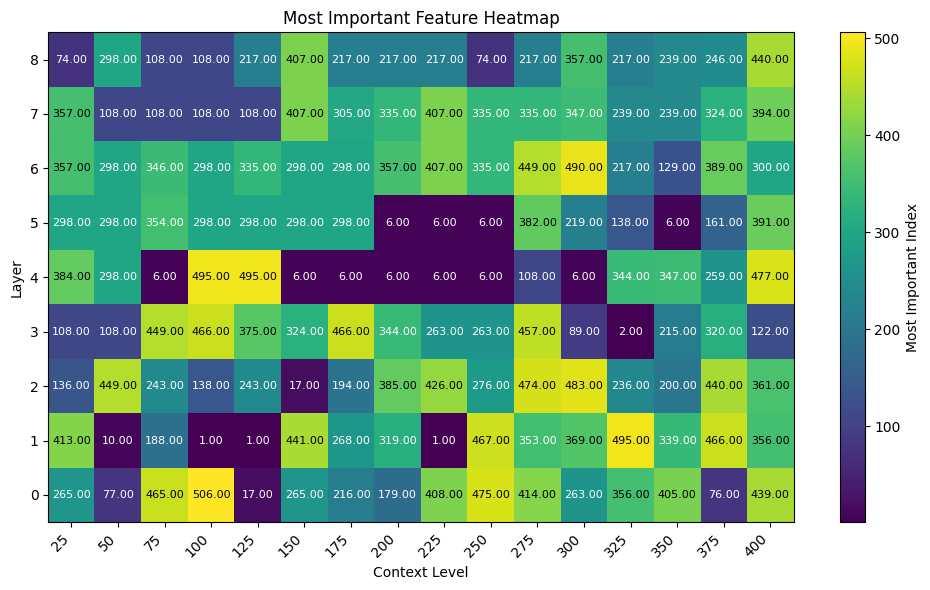

In [4]:
feat_pivot = df.pivot(
    index="Layer",
    columns="Context_Level",
    values="Most_Important_Test_Feature"
)

plot_heatmap(feat_pivot, "Most Important Feature Heatmap")

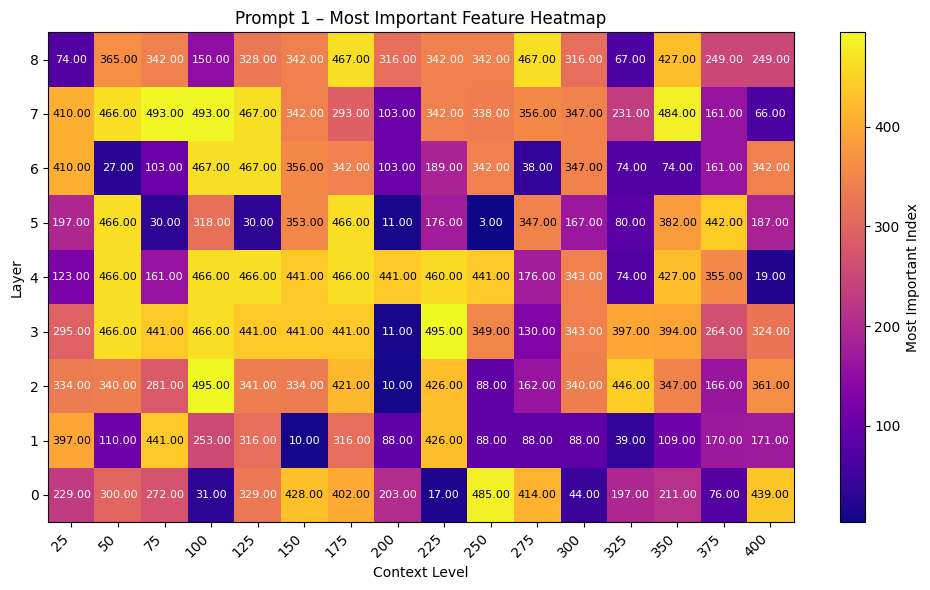

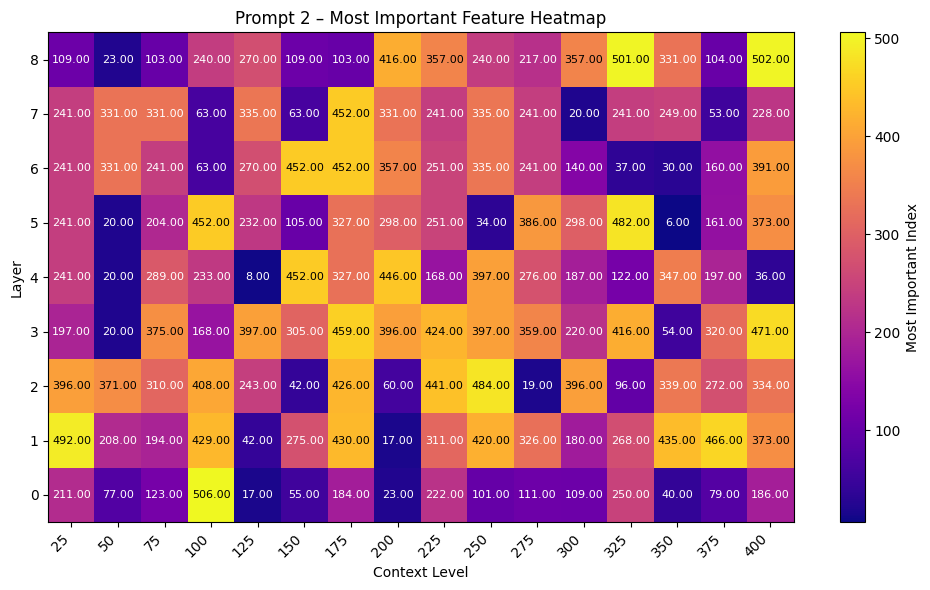

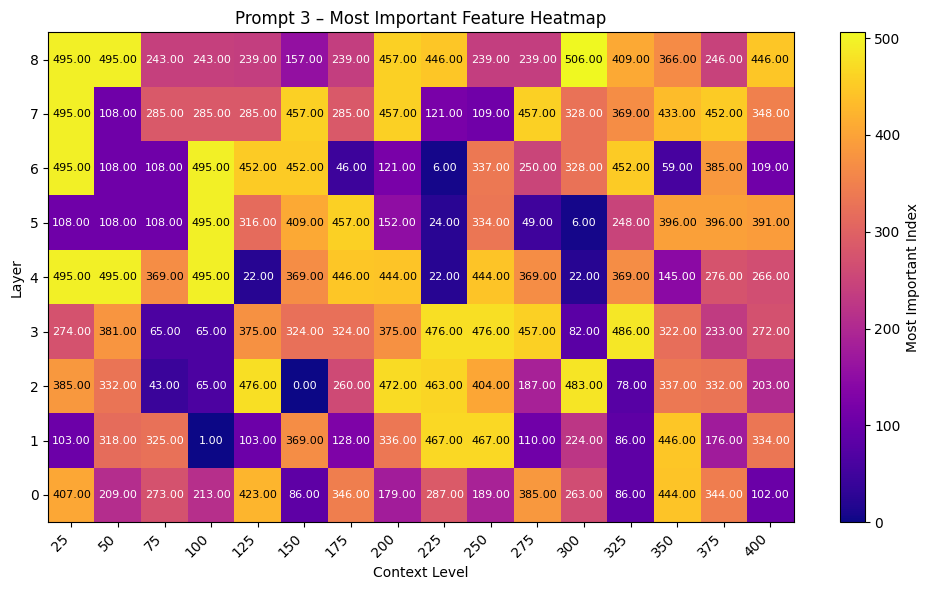

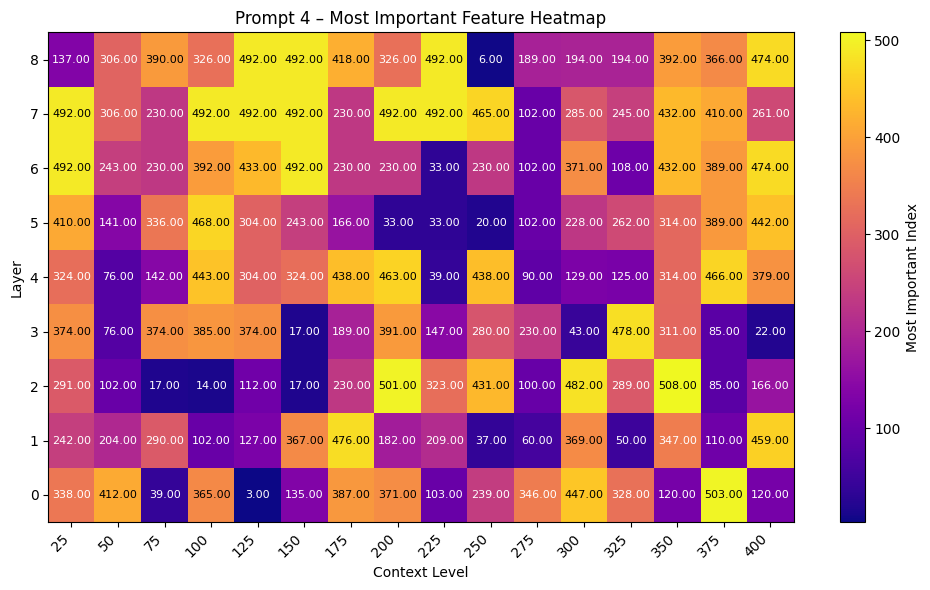

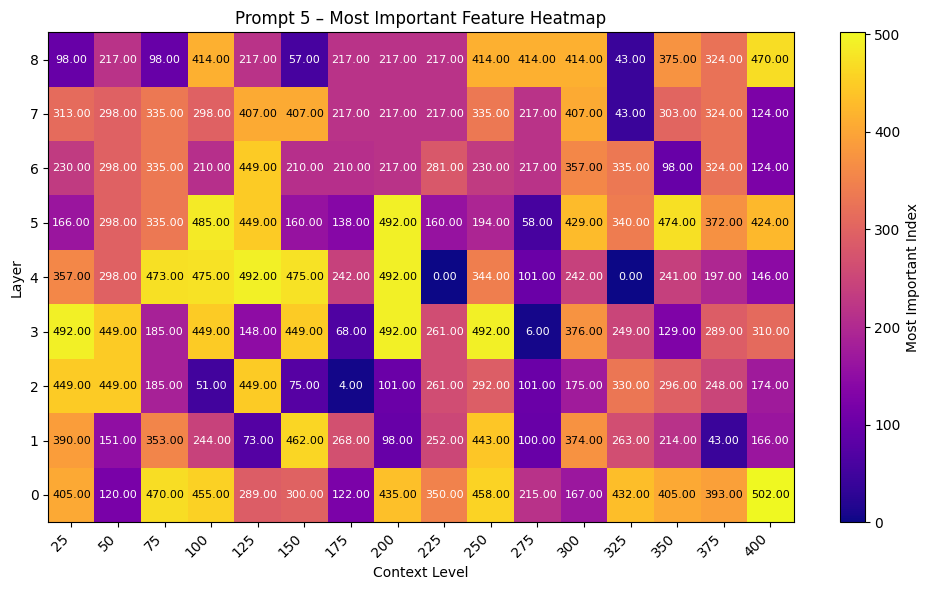

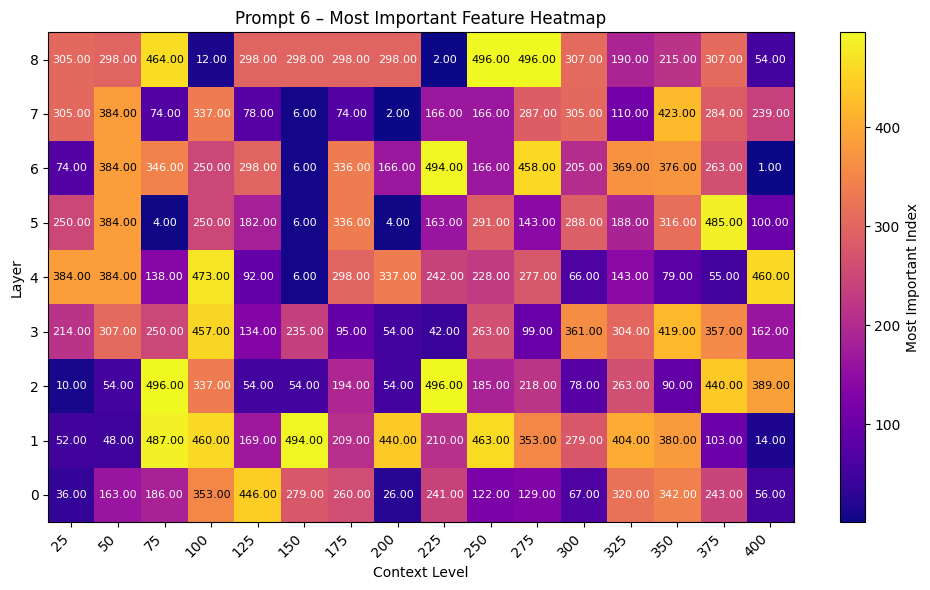

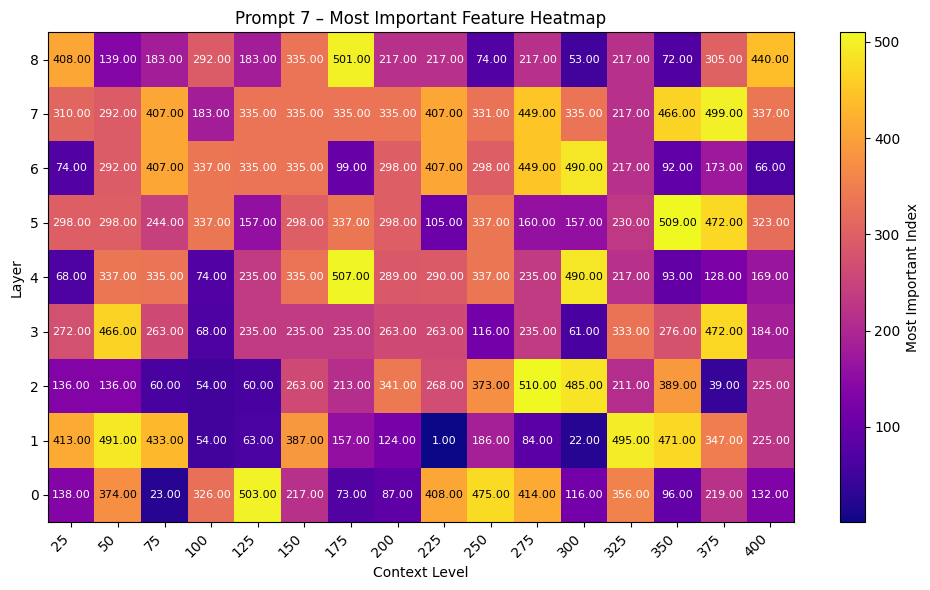

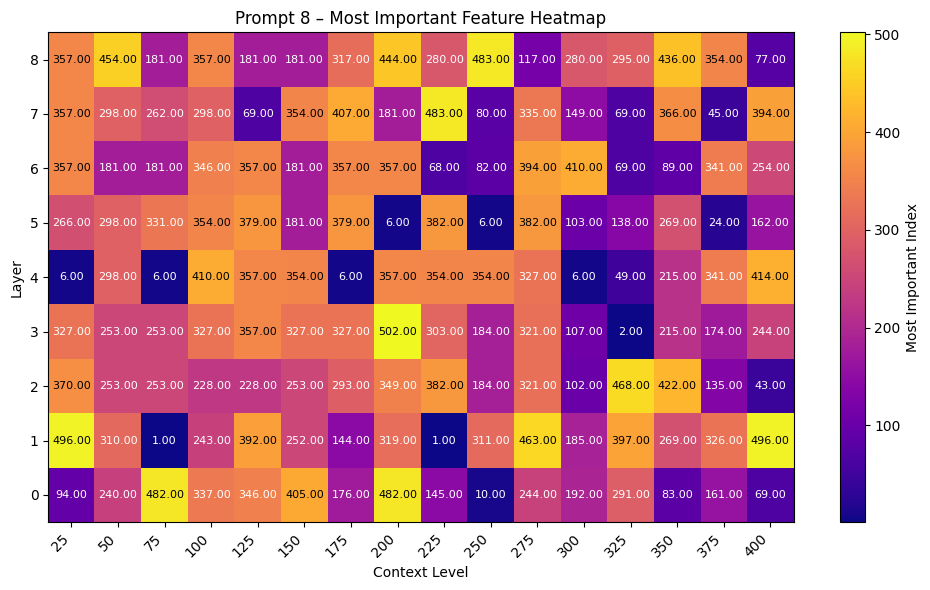

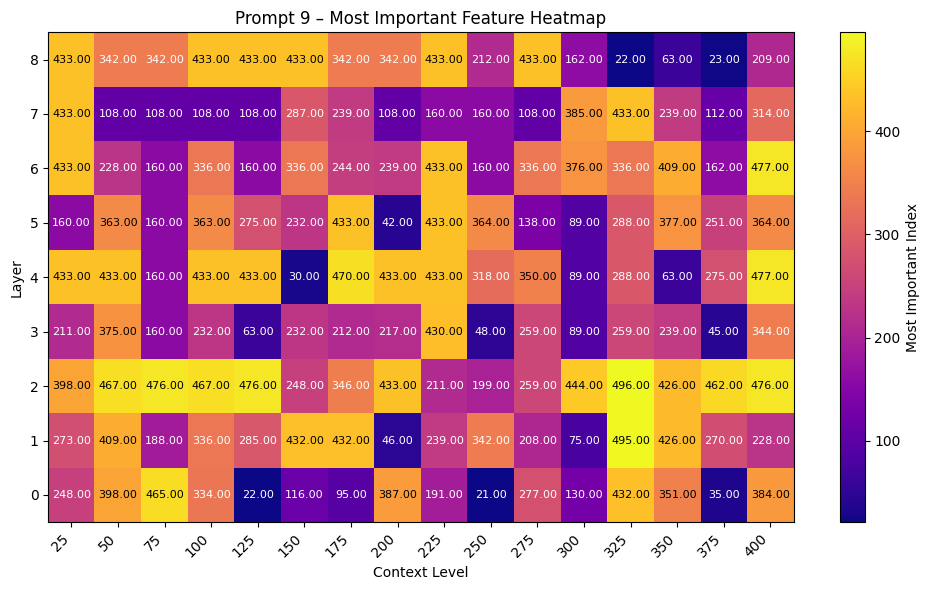

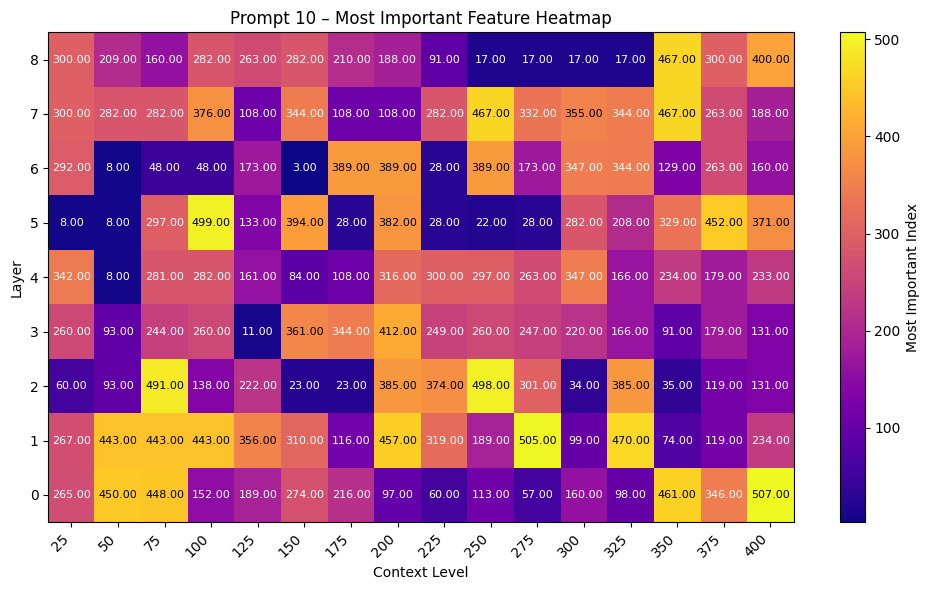

In [5]:
prompt_cols = [c for c in df.columns if c.startswith("Prompt")]

for col in prompt_cols:
    prompt_num = col.split("_")[1]

    pivot = df.pivot(
        index="Layer",
        columns="Context_Level",
        values=col
    )

    plot_heatmap(
        pivot,
        f"Prompt {prompt_num} – Most Important Feature Heatmap",
        cmap="plasma"
    )
